<a href="https://colab.research.google.com/github/Sahithi530/Sahithi_INFO5731_Fall2024/blob/main/Tummala_Sahithi_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [21]:
import csv
from google.colab import files

def ngram_counts(text, n=3):
    """
    Counts the frequency of N-grams in the given text.

    Args:
        text: The input text.
        n: The number of items in each N-gram.

    Returns:
        A dictionary containing N-gram frequencies.
    """
    words = text.split()
    ngrams = {}

    for i in range(len(words) - n + 1):
        ngram = tuple(words[i:i+n])
        ngrams[ngram] = ngrams.get(ngram, 0) + 1

    return ngrams

def process_csv(input_file, output_file='output.csv'):
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        fieldnames = next(reader)  # Get the header row

        with open(output_file, 'w', newline='') as out_file:
            writer = csv.writer(out_file)
            writer.writerow(fieldnames + ['N-Gram Frequencies'])  # Add a new column header

            for row in reader:
                stemmed_text = row[0]  # Assuming the stemmed text is in the first column
                ngram_freq = ngram_counts(stemmed_text)

                # Converting N-gram frequencies to a string
                ngram_freq_str = str(ngram_freq)

                writer.writerow(row + [ngram_freq_str])

    # Download the output file to  system
    files.download(output_file)

# File upload here
uploaded = files.upload()  # This allows you to upload a file in Colab

# Get the name of the uploaded file
input_file = list(uploaded.keys())[0]
process_csv(input_file)


Saving kalki_reviews_stemmed.csv to kalki_reviews_stemmed (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import csv
from google.colab import files

def calculate_bigram_probabilities(text):
    """
    Calculates the probability of bigrams in the given text.

    Args:
        text: The input text.

    Returns:
        A dictionary containing bigram probabilities.
    """
    words = text.split()
    bigram_counts = {}
    word_counts = {}

    # Skip empty texts that are null values
    if len(words) < 2:
        return {}

    # Count bigrams and individual words
    for i in range(len(words) - 1):
        bigram = (words[i], words[i+1])
        bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1
        word_counts[words[i]] = word_counts.get(words[i], 0) + 1

    # Calculate probabilities for bigrams
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        word1, word2 = bigram
        bigram_probabilities[bigram] = count / word_counts[word1]

    return bigram_probabilities

def process_csv():
    """
    Process a CSV file uploaded via Google Colab to calculate bigram probabilities.
    """
    try:
        # Upload the file here
        print("Please upload your CSV file when prompted...")
        uploaded = files.upload()

        if not uploaded:
            print("No file was uploaded.")
            return

        # retrieve the filename of the uploaded file
        input_filename = next(iter(uploaded))
        output_filename = 'bigram_prob_' + input_filename

        # Process the uploaded file
        with open(input_filename, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            fieldnames = next(reader)  # Get the header row

            with open(output_filename, 'w', newline='', encoding='utf-8') as output_file:
                writer = csv.writer(output_file)
                writer.writerow(fieldnames + ['Bigram Probabilities'])

                # loop  each row
                for row in reader:
                    try:
                        stemmed_text = row[0]  # Assuming the stemmed text is in the first column
                        bigram_probs = calculate_bigram_probabilities(stemmed_text)

                        # Format probabilities for better readability
                        formatted_probs = {
                            f"({w1}, {w2})": f"{prob:.4f}"
                            for (w1, w2), prob in bigram_probs.items()
                        }

                        writer.writerow(row + [str(formatted_probs)])

                    except IndexError:
                        print(f"Warning: Skipping malformed row: {row}")
                        continue

        # Download the output file
        print(f"\nProcessing complete. Downloading output file: {output_filename}")
        files.download(output_filename)

    except Exception as e:
        print(f"Error processing file: {str(e)}")

# Example usage
if __name__ == "__main__":
    process_csv()

Please upload your CSV file when prompted...


Saving output (1).csv to output (1).csv

Processing complete. Downloading output file: bigram_prob_output (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import csv
from google.colab import files

def ngram_counts(text, n=3):
    """
    Counts the frequency of N-grams in the given text.

    Args:
        text: The input text.
        n: The number of items in each N-gram.

    Returns:
        A dictionary containing N-gram frequencies.
    """
    words = text.split()
    ngrams = {}

    # Skip texts shorter than n words
    if len(words) < n:
        return {}

    for i in range(len(words) - n + 1):
        ngram = tuple(words[i:i+n])
        ngrams[ngram] = ngrams.get(ngram, 0) + 1

    return ngrams

def process_csv():
    """
    Process a CSV file uploaded via Google Colab to calculate N-gram frequencies.
    """
    try:
        # Upload the file here
        print("Please upload your CSV file when prompted...")
        uploaded = files.upload()

        if not uploaded:
            print("No file was uploaded.")
            return

        # Get the filename of the uploaded file
        input_filename = next(iter(uploaded))
        output_filename = 'ngram_freq_' + input_filename

        # Process the uploaded file
        with open(input_filename, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            fieldnames = next(reader)  # Get the header row

            with open(output_filename, 'w', newline='', encoding='utf-8') as output_file:
                writer = csv.writer(output_file)
                writer.writerow(fieldnames + ['N-Gram Frequencies'])

                # Process each row in file
                row_count = 0
                for row in reader:
                    try:
                        stemmed_text = row[0]  # Assuming the stemmed text is in the first column
                        ngram_freq = ngram_counts(stemmed_text)

                        # Format N-grams for better readability
                        formatted_ngrams = {
                            ' '.join(ngram): freq
                            for ngram, freq in ngram_freq.items()
                        }

                        writer.writerow(row + [str(formatted_ngrams)])
                        row_count += 1

                        # Show progress every 1000 rows
                        if row_count % 1000 == 0:
                            print(f"Processed {row_count} rows...")

                    except IndexError:
                        print(f"Warning: Skipping malformed row: {row}")
                        continue

        # Download the output file
        print(f"\nProcessing complete. Processed {row_count} rows total.")
        print(f"Downloading output file: {output_filename}")
        files.download(output_filename)

    except Exception as e:
        print(f"Error processing file: {str(e)}")

# Example usage
if __name__ == "__main__":
    process_csv()

Please upload your CSV file when prompted...


Saving bigram_prob_output (1).csv to bigram_prob_output (1) (1).csv

Processing complete. Processed 999 rows total.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://myunt-my.sharepoint.com/my?id=%2Fpersonal%2Fsahithitummala%5Fmy%5Funt%5Fedu%2FDocuments%2Fassignement%203

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [26]:
import csv
import math
from time import time
from collections import Counter
from google.colab import files

def create_vocabulary(documents):
    """
    Creates a vocabulary of unique words from the documents.

    Args:
        documents: A list of documents.

    Returns:
        A sorted list of unique words.
    """
    vocabulary = set()
    print("Building vocabulary...")
    start_time = time()

    for i, document in enumerate(documents):
        if isinstance(document, str):  # Check if document is a string
            vocabulary.update(document.split())
        if (i + 1) % 1000 == 0:
            print(f"Processed {i + 1} documents...")

    vocabulary = sorted(list(vocabulary))  # Convert to sorted list for indexing
    print(f"Vocabulary creation took {time() - start_time:.2f} seconds")
    print(f"Vocabulary size: {len(vocabulary)} words")
    return vocabulary

def calculate_tf_idf(documents, vocabulary):
    """
    Calculates TF-IDF scores for each document and word in the vocabulary.

    Args:
        documents: A list of documents.
        vocabulary: A list of unique words.

    Returns:
        A list of TF-IDF vectors, one for each document.
    """
    print("Calculating TF-IDF scores...")
    start_time = time()

    # Create word to index mapping
    word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}

    # Pre-calculate document frequencies
    doc_frequencies = Counter()
    for doc in documents:
        if isinstance(doc, str):
            doc_frequencies.update(set(doc.split()))

    tf_idf_matrix = []
    for i, document in enumerate(documents):
        if not isinstance(document, str):
            print(f"Warning: Document {i} is not a string, skipping...")
            continue

        # Calculate term frequencies
        words = document.split()
        word_counts = Counter(words)
        doc_length = len(words)

        # Calculate TF-IDF scores for every word
        tf_idf_vector = [0] * len(vocabulary)
        for word, count in word_counts.items():
            if word in word_to_idx:
                tf = count / doc_length
                idf = math.log(len(documents) / (1 + doc_frequencies[word]))
                tf_idf_vector[word_to_idx[word]] = tf * idf

        tf_idf_matrix.append(tf_idf_vector)

        if (i + 1) % 1000 == 0:
            print(f"Processed {i + 1} documents...")

    print(f"TF-IDF calculation took {time() - start_time:.2f} seconds")
    return tf_idf_matrix

def process_csv(max_docs=None):
    """
    Process CSV file uploaded to Colab and calculate TF-IDF scores.

    Args:
        max_docs: Maximum number of documents to process (optional)
    """
    try:
        # Upload the file here
        print("Please upload your CSV file when prompted...")
        uploaded = files.upload()

        if not uploaded:
            print("No file was uploaded.")
            return

        # Get the filename of the uploaded file
        input_filename = next(iter(uploaded))
        output_filename = 'tfidf_' + input_filename

        print(f"Reading documents from {input_filename}")
        start_time = time()

        documents = []
        with open(input_filename, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader, None)  # Skip header row if it exists

            for i, row in enumerate(reader):
                if not row:  # Skip empty rows
                    continue
                if max_docs and i >= max_docs:
                    break
                documents.append(row[0])  # Assuming text is in first column

                if (i + 1) % 1000 == 0:
                    print(f"Read {i + 1} documents...")

        print(f"File reading took {time() - start_time:.2f} seconds")
        print(f"Total documents: {len(documents)}")

        # Calculate TF-IDF for the document
        vocabulary = create_vocabulary(documents)
        tf_idf_matrix = calculate_tf_idf(documents, vocabulary)

        # Save results to CSV
        with open(output_filename, 'w', newline='', encoding='utf-8') as output_file:
            writer = csv.writer(output_file)
            writer.writerow(['Document_ID', 'Top_Terms_with_TF_IDF_Scores'])

            for i, doc_vector in enumerate(tf_idf_matrix):
                # Get top 10 terms for this document
                scores = [(vocabulary[j], score) for j, score in enumerate(doc_vector)]
                scores.sort(key=lambda x: x[1], reverse=True)
                top_terms = {word: f"{score:.4f}" for word, score in scores[:10]}

                writer.writerow([i, str(top_terms)])

        # Download the output file
        print(f"\nProcessing complete. Downloading output file: {output_filename}")
        files.download(output_filename)

        # Print sample results
        print("\nSample TF-IDF scores (first document, top 10 terms):")
        if tf_idf_matrix:
            scores = [(vocabulary[i], score) for i, score in enumerate(tf_idf_matrix[0])]
            scores.sort(key=lambda x: x[1], reverse=True)
            for word, score in scores[:10]:
                print(f"{word}: {score:.4f}")

    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
    finally:
        print("\nProcessing complete")

# Example usage
if __name__ == "__main__":
    # Process only first 1000 documents for testing
    process_csv(max_docs=1000)

Please upload your CSV file when prompted...


Saving ngram_freq_bigram_prob_output (1) (1).csv to ngram_freq_bigram_prob_output (1) (1) (1).csv
Reading documents from ngram_freq_bigram_prob_output (1) (1) (1).csv
File reading took 0.20 seconds
Total documents: 999
Building vocabulary...
Vocabulary creation took 0.03 seconds
Vocabulary size: 1740 words
Calculating TF-IDF scores...
TF-IDF calculation took 0.18 seconds

Processing complete. Downloading output file: tfidf_ngram_freq_bigram_prob_output (1) (1) (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Sample TF-IDF scores (first document, top 10 terms):
were: 0.0399
second: 0.0300
To: 0.0298
adapt: 0.0298
average: 0.0298
bloated: 0.0298
choreographed: 0.0298
cringe: 0.0298
drawn: 0.0298
epicness: 0.0298

Processing complete


In [28]:
import csv
import math
from time import time
from collections import Counter
from google.colab import files

def create_vocabulary(documents):
    vocabulary = set()
    for document in documents:
        if isinstance(document, str):
            vocabulary.update(document.split())
    return sorted(list(vocabulary))

    #calculating tf-idf with cosine similarity

def calculate_tf_idf(documents, vocabulary):
    word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}
    doc_frequencies = Counter()

    for doc in documents:
        if isinstance(doc, str):
            doc_frequencies.update(set(doc.split()))

    tf_idf_matrix = []
    for document in documents:
        if not isinstance(document, str):
            continue
        words = document.split()
        word_counts = Counter(words)
        doc_length = len(words)
        tf_idf_vector = [0] * len(vocabulary)

        for word, count in word_counts.items():
            if word in word_to_idx:
                tf = count / doc_length
                idf = math.log(len(documents) / (1 + doc_frequencies[word]))
                tf_idf_vector[word_to_idx[word]] = tf * idf

        tf_idf_matrix.append(tf_idf_vector)

    return tf_idf_matrix
#create a vector
def create_query_vector(query, vocabulary, doc_frequencies, num_docs):
    word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}
    words = query.split()
    word_counts = Counter(words)
    doc_length = len(words)
    tf_idf_vector = [0] * len(vocabulary)

    for word, count in word_counts.items():
        if word in word_to_idx:
            tf = count / doc_length
            idf = math.log(num_docs / (1 + doc_frequencies[word]))
            tf_idf_vector[word_to_idx[word]] = tf * idf

    return tf_idf_vector
    #finding between 2 vectors that we created

def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude1 = math.sqrt(sum(a ** 2 for a in vec1))
    magnitude2 = math.sqrt(sum(b ** 2 for b in vec2))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0
    return dot_product / (magnitude1 * magnitude2)

    #processing out input file

def process_csv(max_docs=None, query=None):
    try:
        uploaded = files.upload()

        if not uploaded:
            print("No file was uploaded.")
            return

        input_filename = next(iter(uploaded))
        output_filename = 'tfidf_' + input_filename

        documents = []
        with open(input_filename, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader, None)  # Skip header row

            for i, row in enumerate(reader):
                if not row:
                    continue
                if max_docs and i >= max_docs:
                    break
                documents.append(row[0])

        vocabulary = create_vocabulary(documents)
        tf_idf_matrix = calculate_tf_idf(documents, vocabulary)

        # If a query is provided, calculate its TF-IDF vector and rank documents
        if query:
            print(f"\nRanking documents for query: \"{query}\"")
            doc_frequencies = Counter()
            for doc in documents:
                if isinstance(doc, str):
                    doc_frequencies.update(set(doc.split()))

            query_vector = create_query_vector(query, vocabulary, doc_frequencies, len(documents))

            # Calculate cosine similarity manually between query and each document
            similarities = []
            for i, doc_vector in enumerate(tf_idf_matrix):
                similarity = cosine_similarity(query_vector, doc_vector)
                similarities.append((i, similarity))

            # Rank documents by similarity
            similarities.sort(key=lambda x: x[1], reverse=True)

            # Output top 5 ranked documents for brevity
            print("\nTop 5 documents ranked by query relevance:")
            for rank, (doc_idx, score) in enumerate(similarities[:5], start=1):
                print(f"Rank {rank} (Document {doc_idx}): Similarity = {score:.4f}")

    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
    finally:
        print("\nProcessing complete")

# Example usage with a query
if __name__ == "__main__":
    query_text = "An outstanding movie with a haunting performance and best character development"
    process_csv(max_docs=1000, query=query_text)


Saving tfidf_ngram_freq_bigram_prob_output (1) (1) (1).csv to tfidf_ngram_freq_bigram_prob_output (1) (1) (1) (1).csv

Ranking documents for query: "An outstanding movie with a haunting performance and best character development"

Top 5 documents ranked by query relevance:
Rank 1 (Document 0): Similarity = 0.0000
Rank 2 (Document 1): Similarity = 0.0000
Rank 3 (Document 2): Similarity = 0.0000
Rank 4 (Document 3): Similarity = 0.0000
Rank 5 (Document 4): Similarity = 0.0000

Processing complete


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Since I am curious about the semantic and syntactic connections among the words in N-grams, I used word-level tokenization and trained a word embedding model on the separate words.

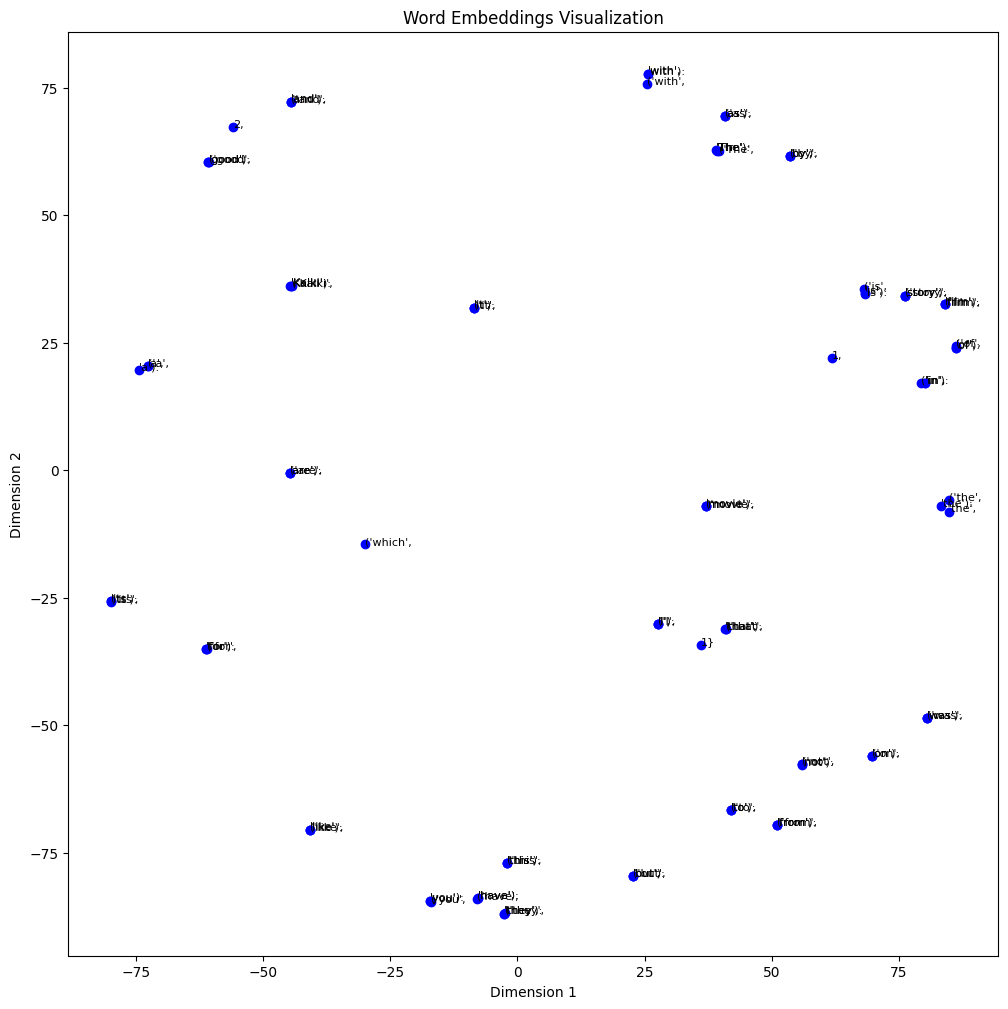

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:


# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from google.colab import files

# Upload file to Colab
# Load the data
# Replace 'your_file.csv' with the uploaded file name or the Google Drive path if mounted
data = pd.read_csv('ngram_freq_bigram_prob_output (1) (1).csv')
documents = data['N-Gram Frequencies'].apply(lambda x: x.split()).tolist()  # Assuming 'N-Gram Frequencies' is space-separated

# Train the Word2Vec model
model = Word2Vec(documents, vector_size=300, window=5, min_count=5, workers=4)

# Get the vocabulary
vocab = list(model.wv.key_to_index.keys())

# Extract the  vectors
word_vectors = model.wv[vocab]

# Reduce the dimensionality of the word vectors using t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Visualize the word embeddings
plt.figure(figsize=(12, 12))
for i, word in enumerate(vocab[:100]):  # Limiting to 100 words for readability
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], color='blue')
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word, fontsize=8)
plt.title('Word Embeddings Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Save and display
plt.savefig('word_embeddings_visualization.png')
plt.show()

# Download the file
files.download('word_embeddings_visualization.png')


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


https://github.com/Sahithi530/Sahithi_INFO5731_Fall2024/blob/main/annotated_reviews_sentiment.csv




# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

How promptly one could complete the assignment is swayed by the amount and the difficulty of the dataset, the word embedding model chosen and the degree of visualization which are all technically required. An easy-to-use implementation could have been executed in the given period, but regarding other problems—like training large language models or experimenting with advanced visualization techniques—more time is necessary. Notwithstanding, the assignment served as a good opportunity to engage in the exploration of word embeddings and their applications. By successfully resolving the issues and utilizing the bucket of advantages of several strategies, we can build the language models that have the required characteristics for a broad series of NLP tasks.
